# Tutorial of Node Schematas - PI & TwoSymbol
Visualization of schematas for simple boolean nodes (automatas)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from __future__ import division
import numpy as np
import pandas as pd
from IPython.display import Image, display
import cana
from cana.datasets.bools import *
from cana.drawing.canalizing_map import draw_canalizing_map_graphviz

<BNode(name='OR', k=2, inputs=[i1,i2], state=0, outputs='[0,1,1,1]' constant=False)>
k_r: 0.75 - 0.75
k_e: 1.25 - 1.25
k_s: 2.00 - 2.00

k_r: [0.5, 0.5] (upper)
k_e: [0.5, 0.5] (upper)



Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        00    0        00    0
1           01    1        1#    1      1̊#̊    1
2           10    1        #1    1         -    -
3           11    1         -    -         -    -

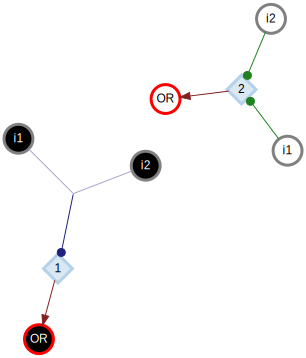

In [4]:
n = OR()
print( n)
print( 'k_r: %.2f - %.2f' % (n.input_redundancy(mode='node',bound='upper',norm=False), n.input_redundancy(mode='node',bound='lower',norm=False)))
print( 'k_e: %.2f - %.2f' % (n.effective_connectivity(mode='node',bound='upper',norm=False), n.effective_connectivity(mode='node',bound='lower',norm=False)))
print( 'k_s: %.2f - %.2f' % (n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print()

print( 'k_r: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print( 'k_e: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print()

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(name='Con', k=2, inputs=[i1,i2], state=0, outputs='[0,0,0,0]' constant=True)>
k_r: 2.00 - 2.00
k_e: 0.00 - 0.00
k_s: 2.00 - 2.00

k_r: [1.0, 1.0] (upper)
k_e: [1.0, 1.0] (upper)


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        ##    0        ##    0
1           01    0         -    -         -    -
2           10    0         -    -         -    -
3           11    0         -    -         -    -

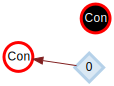

In [5]:
n = CONTRADICTION()
n.name = 'Con'
print( n)
print( 'k_r: %.2f - %.2f' % (n.input_redundancy(mode='node',bound='upper',norm=False), n.input_redundancy(mode='node',bound='lower',norm=False)))
print( 'k_e: %.2f - %.2f' % (n.effective_connectivity(mode='node',bound='upper',norm=False), n.effective_connectivity(mode='node',bound='lower',norm=False)))
print( 'k_s: %.2f - %.2f' % (n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print()

print( 'k_r: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print( 'k_e: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print 

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(name='XOR', k=2, inputs=[i1,i2], state=0, outputs='[0,1,1,0]' constant=False)>
k_r: 0.00 - 0.00
k_e: 2.00 - 2.00
k_s: 2.00 - 2.00

k_r: [0.0, 0.0] (upper)
k_e: [0.0, 0.0] (upper)
TS: 11 | PermIdx: [] | SameIdx: [[0, 1]]
TS: 00 | PermIdx: [] | SameIdx: [[0, 1]]
TS: 10 | PermIdx: [[0, 1]] | SameIdx: []


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        11    0        11    0
1           01    1        00    0        00    0
2           10    1        10    1      1̊0̊    1
3           11    0        01    1         -    -

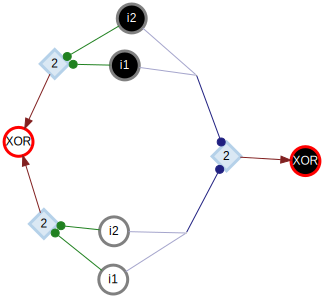

In [6]:
n = XOR()
print( n)
print( 'k_r: %.2f - %.2f' % (n.input_redundancy(mode='node',bound='upper',norm=False), n.input_redundancy(mode='node',bound='lower',norm=False)))
print( 'k_e: %.2f - %.2f' % (n.effective_connectivity(mode='node',bound='upper',norm=False), n.effective_connectivity(mode='node',bound='lower',norm=False)))
print( 'k_s: %.2f - %.2f' % (n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print()

print( 'k_r: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print( 'k_e: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print 
for input in [0,1]:
    for ts,per,sms in n._two_symbols[input]:
        print( 'TS: %s | PermIdx: %s | SameIdx: %s' % (ts, per,sms))
dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(name='AND', k=2, inputs=[i1,i2], state=0, outputs='[0,0,0,1]' constant=False)>
k_r: 0.75 - 0.75
k_e: 1.25 - 1.25
k_s: 2.00 - 2.00

k_r: [0.5, 0.5] (upper)
k_e: [0.5, 0.5] (upper)


Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        0#    0      0̊#̊    0
1           01    0        #0    0        11    1
2           10    0        11    1         -    -
3           11    1         -    -         -    -

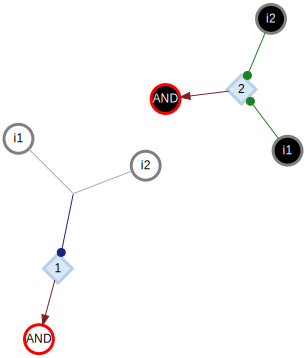

In [7]:
n = AND()
print( n)
print( 'k_r: %.2f - %.2f' % (n.input_redundancy(mode='node',bound='upper',norm=False), n.input_redundancy(mode='node',bound='lower',norm=False)))
print( 'k_e: %.2f - %.2f' % (n.effective_connectivity(mode='node',bound='upper',norm=False), n.effective_connectivity(mode='node',bound='lower',norm=False)))
print( 'k_s: %.2f - %.2f' % (n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print()

print( 'k_r: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print( 'k_e: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print 

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(name='CPx1', k=2, inputs=[i1,i2], state=0, outputs='[0,0,1,1]' constant=False)>
k_r: 1.00 - 1.00
k_e: 1.00 - 1.00
k_s: 0.00 - 0.00

k_r: [0.0, 1.0] (upper)
k_e: [0.0, 1.0] (upper)



Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0           00    0        0#    0        0#    0
1           01    0        1#    1        1#    1
2           10    1         -    -         -    -
3           11    1         -    -         -    -

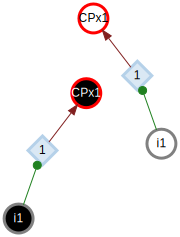

In [7]:
n = COPYx1()
n.name = 'CPx1'
print( n)
print( 'k_r: %.2f - %.2f' % (n.input_redundancy(mode='node',bound='upper',norm=False), n.input_redundancy(mode='node',bound='lower',norm=False)))
print( 'k_e: %.2f - %.2f' % (n.effective_connectivity(mode='node',bound='upper',norm=False), n.effective_connectivity(mode='node',bound='lower',norm=False)))
print('k_s: %.2f - %.2f' % (n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print

print( 'k_r: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print( 'k_e: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print()

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(name='R90', k=3, inputs=[i1,i2,i3], state=0, outputs='[0,1,0,1,1,0,1,0]' constant=False)>
k_r: 1.00 - 1.00
k_e: 2.00 - 2.00
k_s: 1.33 - 1.33

k_r: [0.0, 1.0, 0.0] (upper)
k_e: [0.0, 1.0, 0.0] (upper)



Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0          000    0       1#1    0       1#1    0
1          001    1       0#0    0       0#0    0
2          010    0       0#1    1     0̊#1̊    1
3          011    1       1#0    1         -    -
4          100    1         -    -         -    -
5          101    0         -    -         -    -
6          110    1         -    -         -    -
7          111    0         -    -         -    -

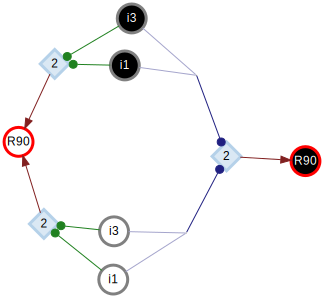

In [8]:
n = RULE90()
n.name = 'R90'
print( n)
print( 'k_r: %.2f - %.2f' % (n.input_redundancy(mode='node',bound='upper',norm=False), n.input_redundancy(mode='node',bound='lower',norm=False)))
print( 'k_e: %.2f - %.2f' % (n.effective_connectivity(mode='node',bound='upper',norm=False), n.effective_connectivity(mode='node',bound='lower',norm=False)))
print( 'k_s: %.2f - %.2f' % (n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print()

print( 'k_r: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print( 'k_e: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print()

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())

<BNode(name='R110', k=3, inputs=[i1,i2,i3], state=0, outputs='[0,1,1,1,0,1,1,0]' constant=False)>
k_r: 0.88 - 0.88
k_e: 2.12 - 2.12
k_s: 1.96 - 1.04

k_r: [0.75, 0.25, 0.25] (upper)
k_e: [0.75, 0.25, 0.25] (upper)



Original LUT      PI Schema      TS Schema     
           In: Out:       In: Out:       In: Out:
0          000    0       111    0       111    0
1          001    1       #00    0       #00    0
2          010    1       #10    1     #1̊0̊    1
3          011    1       #01    1     #̊0̊1    1
4          100    0       0#1    1     #̊10̊    1
5          101    1       01#    1     0#̊1̊    1
6          110    1         -    -         -    -
7          111    0         -    -         -    -

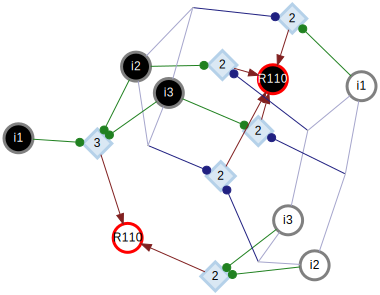

In [9]:
n = RULE110()
n.name = 'R110'
print( n)
print( 'k_r: %.2f - %.2f' % (n.input_redundancy(mode='node',bound='upper',norm=False), n.input_redundancy(mode='node',bound='lower',norm=False)))
print( 'k_e: %.2f - %.2f' % (n.effective_connectivity(mode='node',bound='upper',norm=False), n.effective_connectivity(mode='node',bound='lower',norm=False)))
print( 'k_s: %.2f - %.2f' % (n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print()

print( 'k_r: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print( 'k_e: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print()

dfLUT, dfPI, dfTS = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TS Schema':dfTS}, axis=1).fillna('-'))
draw_canalizing_map_graphviz(n.canalizing_map())